# Modelo 1

Aqui se confecciona la red neuronal del modelo 1 que clasifica al pilote en condicion de daño leve y daño severo.

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

import pandas as pd
import numpy as np

from variables import plot_up

In [2]:
X = pd.read_csv("dataset/df_input_norm.csv")
y = pd.read_csv("dataset/df_output_norm.csv").iloc[:,1]

In [3]:
from sklearn.model_selection import train_test_split

X_train_0, X_test, y_train_0, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train_0, y_train_0, test_size=0.20, random_state=42)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [6]:
model = Sequential()
model.add(Dense(2, activation = "relu", input_dim = 2))
model.add(Dense(4, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation="sigmoid"))
model.add(Dense(units = 1))

In [7]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, batch_size = 8, epochs = 25, validation_data=(X_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 555 samples, validate on 139 samples
Epoch 1/25
555/555 [==============================] - 0s 731us/step - loss: 0.9111 - accuracy: 0.4126 - val_loss: 0.6682 - val_accuracy: 0.6043
Epoch 2/25
555/555 [==============================] - 0s 227us/step - loss: 0.6510 - accuracy: 0.6144 - val_loss: 0.5789 - val_accuracy: 0.6835
Epoch 3/25
555/555 [==============================] - 0s 241us/step - loss: 0.5959 - accuracy: 0.6360 - val_loss: 0.5588 - val_accuracy: 0.6835
Epoch 4/25
555/555 [==============================] - 0s 243us/step - loss: 0.5775 - accuracy: 0.6360 - val_loss: 0.5415 - val_accuracy: 0.6835
Epoch 5/25
555/555 [==============================] - 0s 263us/step - loss: 0.5648 - accuracy: 0.6360 - val_loss: 0.5332 - val_accuracy: 0.6835
Epoch 6/25
555/555 [==============================] - 0s 240us/step - loss: 0.5557 - accuracy: 0.6360 - val_loss: 0.5238 - val_accuracy: 0.

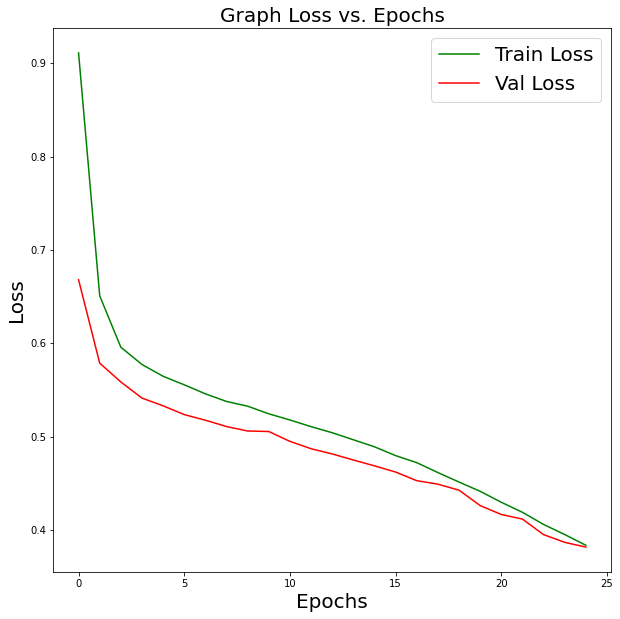

In [9]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(10,10))
epocas = range(0,25)
plt.plot(epocas,loss , 'r-', c="g", label='Train Loss')
plt.plot(epocas,val_loss , 'r-', c="r", label='Val Loss')
plt.title('Graph Loss vs. Epochs', size=20)
plt.xlabel('Epochs', size=20)
plt.ylabel('Loss',size=20)
plt.legend( prop={'size': 20})
plt.show()

In [10]:
model.evaluate(X_test, y_test)

174/174 [==============================] - 0s 69us/step


[0.4613586701880926, 0.8045976758003235]

In [11]:
model.save('modelo_nn1_v1.h5')